# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewanti Nariswari
- **Email:** dewanti.nariswari2003@gmail.com
- **ID Dicoding:** dantidn

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Rentang waktu mana yang menunjukkan permintaan tertinggi dan terendah untuk penyewaan sepeda?
- Pertanyaan 2: Seberapa besar kontribusi pengguna terdaftar dan pengguna kasual terhadap total penyewaan?

## Import Semua Packages/Library yang Digunakan

In [42]:
# memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Memuat tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Load tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua tabel memiliki kolom yang sama, menunjukkan bahwa keduanya terkait dan menangkap titik data yang serupa
- Kolom dteday dalam kedua tabel menunjukkan bahwa data diorganisir berdasarkan tanggal
- Tabel hour memberikan data pada tingkat jam, sedangkan tabel day kemungkinan mengagregasi data untuk setiap hari
- Kedua tabel mencakup kolom yang terkait dengan kondisi cuaca (temp, atemp, hum, windspeed) dan penggunaan sepeda (casual, registered, cnt)

### Assessing Data

In [43]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [44]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [45]:
# Periksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [47]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [48]:
# Menampilkan informasi terkait jumlah missing values yang terdapat dalam setiap kolom
hour_df.isna().sum()

,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [49]:
# Periksa duplikasi data dan parameter statistik dari kolom numerik yang terdapat dalam day_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  2


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ada kesalahan tipe data untuk kolom dteday pada tabel day dan hour (harusnya tipe data datetime, bukan object atau string)

### Cleaning Data

Membersihkan Data day_df

In [53]:
# ada kesalahan tipe data untuk kolom dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
     #  function to_datetime() mengganti tipe data pada kolom dateday menjadi datetime
  day_df[column] = pd.to_datetime(day_df[column])

# memastikan hal ini berjalan sesuai harapan/ periksa kembali tipe data tersebut
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


Membersihkan Data hour_df

In [14]:
# ada kesalahan tipe data untuk kolom dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
     #  function to_datetime() mengganti tipe data pada kolom dateday menjadi datetime
  hour_df[column] = pd.to_datetime(hour_df[column])

# memastikan hal ini berjalan sesuai harapan/ periksa kembali tipe data tersebut
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [54]:
# ubah tipe data int menjadi category pada kolom season, mnth, holiday, weekday, weathersit
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [59]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

# konversi mnth menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_map = {i: month for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])}
day_df['mnth'] = day_df['mnth'].map(month_map) # Changed 'month' to 'mnth'
hour_df['mnth'] = hour_df['mnth'].map(month_map) # Changed 'month' to 'mnth'

# konversi weather_situation menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
weather_situation_map = {1: 'Clear', 2: 'Misty', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weathersit'] = day_df['weathersit'].map(weather_situation_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_situation_map)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_of_week_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_df['weekday'] = day_df['weekday'].map(day_of_week_map)
hour_df['weekday'] = hour_df['weekday'].map(day_of_week_map)

# konversi year menjadi: 0:2011, 1:2012
year_map = {0: '2011', 1: '2012'}
day_df['yr'] = day_df['yr'].map(year_map)
hour_df['yr'] = hour_df['yr'].map(year_map)

# menghitung Humidity
day_df['hum'] = day_df['hum'].apply(lambda x: x * 100)
hour_df['hum'] = hour_df['hum'].apply(lambda x: x * 100)

In [67]:
# membuat kolom baru category_days untuk melihatkan isi kolom nya adalah weekend atau weekdays
day_df['category_days'] = np.where(day_df['weekday'].isin(['Saturday', 'Sunday']), 'weekend', 'weekdays')
hour_df['category_days'] = np.where(hour_df['weekday'].isin(['Saturday', 'Sunday']), 'weekend', 'weekdays')

# membuat kolom baru humidity_category untuk melihatkan status kelembapan
day_df['humidity_category'] = np.where(day_df['hum'] < 45, 'Terlalu kering', np.where(day_df['hum'] < 65, 'Ideal', 'Terlalu Lembab'))
hour_df['humidity_category'] = np.where(hour_df['hum'] < 45, 'Terlalu kering', np.where(hour_df['hum'] < 65, 'Ideal', 'Terlalu Lembab'))

**Insight:**
- Kedua tabel tidak memiliki missing values, menunjukkan data lengkap.
- Semua kolom memiliki jenis data yang sesuai: int64 untuk nilai integer, float64 untuk nilai desimal, datetime64[ns] untuk tanggal dan waktu.
- Data tampak konsisten dalam setiap tabel dan di antara kedua tabel, terutama setelah mengonversi dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [68]:
# melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,category_days,humidity_category
count,731.000000,731,0,0,0,731.0,0.0,0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,0,0,0,2.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
top,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,NaN,NaN,NaN,710.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [22]:
# Group by season dan hitung rata-rata jumlah penyewaan
season_avg = day_df.groupby('season')['cnt'].agg(['mean', 'median', 'std'])
print(season_avg)

               mean  median          std
season                                  
1       2604.132597  2209.0  1399.942119
2       4992.331522  4941.5  1695.977235
3       5644.303191  5353.5  1459.800381
4       4728.162921  4634.5  1699.615261


Berdasarkan data yang diperoleh, summer (2) dan fall (3) menunjukkan frekuensi yang paling tinggi dibandingkan musim lainnya

In [87]:
# menganalisis tren jumlah penyewaan sepeda setiap tahun untuk kolom registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})
day_df.pivot_table(index='yr', values=['registered', 'casual'], aggfunc='sum')

""
yr


In [21]:
# Group by weekday dan hitung rata-rata jumlah penyewaan
weekday_avg = day_df.groupby('weekday')['cnt'].mean()
print(weekday_avg)

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


In [25]:
# Mengelompokkan berdasarkan musim dan hari kerja, lalu hitung rata-rata penyewaan
grouped = day_df.groupby(['season', 'weekday'])['cnt'].mean().unstack()
print(grouped)

weekday            0            1            2            3            4  \
season                                                                     
1        2229.444444  2452.730769  2792.520000  2611.080000  2894.200000   
2        4986.538462  4565.000000  4824.961538  4835.074074  5200.269231   
3        5324.269231  5627.192308  5656.111111  5853.851852  5698.607143   
4        4451.961538  4698.846154  4658.923077  4766.800000  4730.880000   

weekday            5            6  
season                             
1        2856.307692  2432.333333  
2        5222.769231  5334.192308  
3        5750.629630  5584.962963  
4        4898.680000  4906.040000  


In [30]:
# Analisis tren tahunan
yearly_rental = day_df.groupby('yr')['cnt'].sum()
print(yearly_rental)

yr
0    1243103
1    2049576
Name: cnt, dtype: int64


In [26]:
# Mendeteksi outliers menggunakan metode IQR
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outliers = day_df[(day_df['cnt'] < (Q1 - 1.5 * IQR)) | (day_df['cnt'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### Eksplorasi Data hour_df

### Eksplorasi Data all_df

In [119]:
# membuat sebuah DataFrame baru bernama all_df untuk menampung semua informasi dari keempat tabel yang kita miliki
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="yr",
    right_on="yr"
)
all_df.head()

,instant,dteday,season_x,yr,mnth_x,holiday_x,weekday_x,weathersit_x,temp_x,atemp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,category_days_y,humidity_category_y
0,1,2011-01-01,NaN,NaN,NaN,0,NaN,NaN,0.344167,0.363625,...,NaN,0.24,0.2879,81.0,0.0,3,13,16,weekdays,Terlalu Lembab
1,1,2011-01-01,NaN,NaN,NaN,0,NaN,NaN,0.344167,0.363625,...,NaN,0.22,0.2727,80.0,0.0,8,32,40,weekdays,Terlalu Lembab
2,1,2011-01-01,NaN,NaN,NaN,0,NaN,NaN,0.344167,0.363625,...,NaN,0.22,0.2727,80.0,0.0,5,27,32,weekdays,Terlalu Lembab
3,1,2011-01-01,NaN,NaN,NaN,0,NaN,NaN,0.344167,0.363625,...,NaN,0.24,0.2879,75.0,0.0,3,10,13,weekdays,Terlalu Lembab
4,1,2011-01-01,NaN,NaN,NaN,0,NaN,NaN,0.344167,0.363625,...,NaN,0.24,0.2879,75.0,0.0,0,1,1,weekdays,Terlalu Lembab


In [120]:
# menyimpan DataFrame all_df ke dalam file CSV
all_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Rentang waktu mana yang menunjukkan permintaan tertinggi dan terendah untuk penyewaan sepeda?

In [91]:
# Melakukan pengelompokan berdasarkan 'hours' dan menjumlahkan 'count_cr'
sum_order_items_df = hour_df.groupby("hr")["cnt"].agg('sum').sort_values(ascending=False).reset_index()
sum_order_items_df

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


<ipython-input-95-2c74e79ebcb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_order_items_df.nlargest(5, 'cnt'),
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

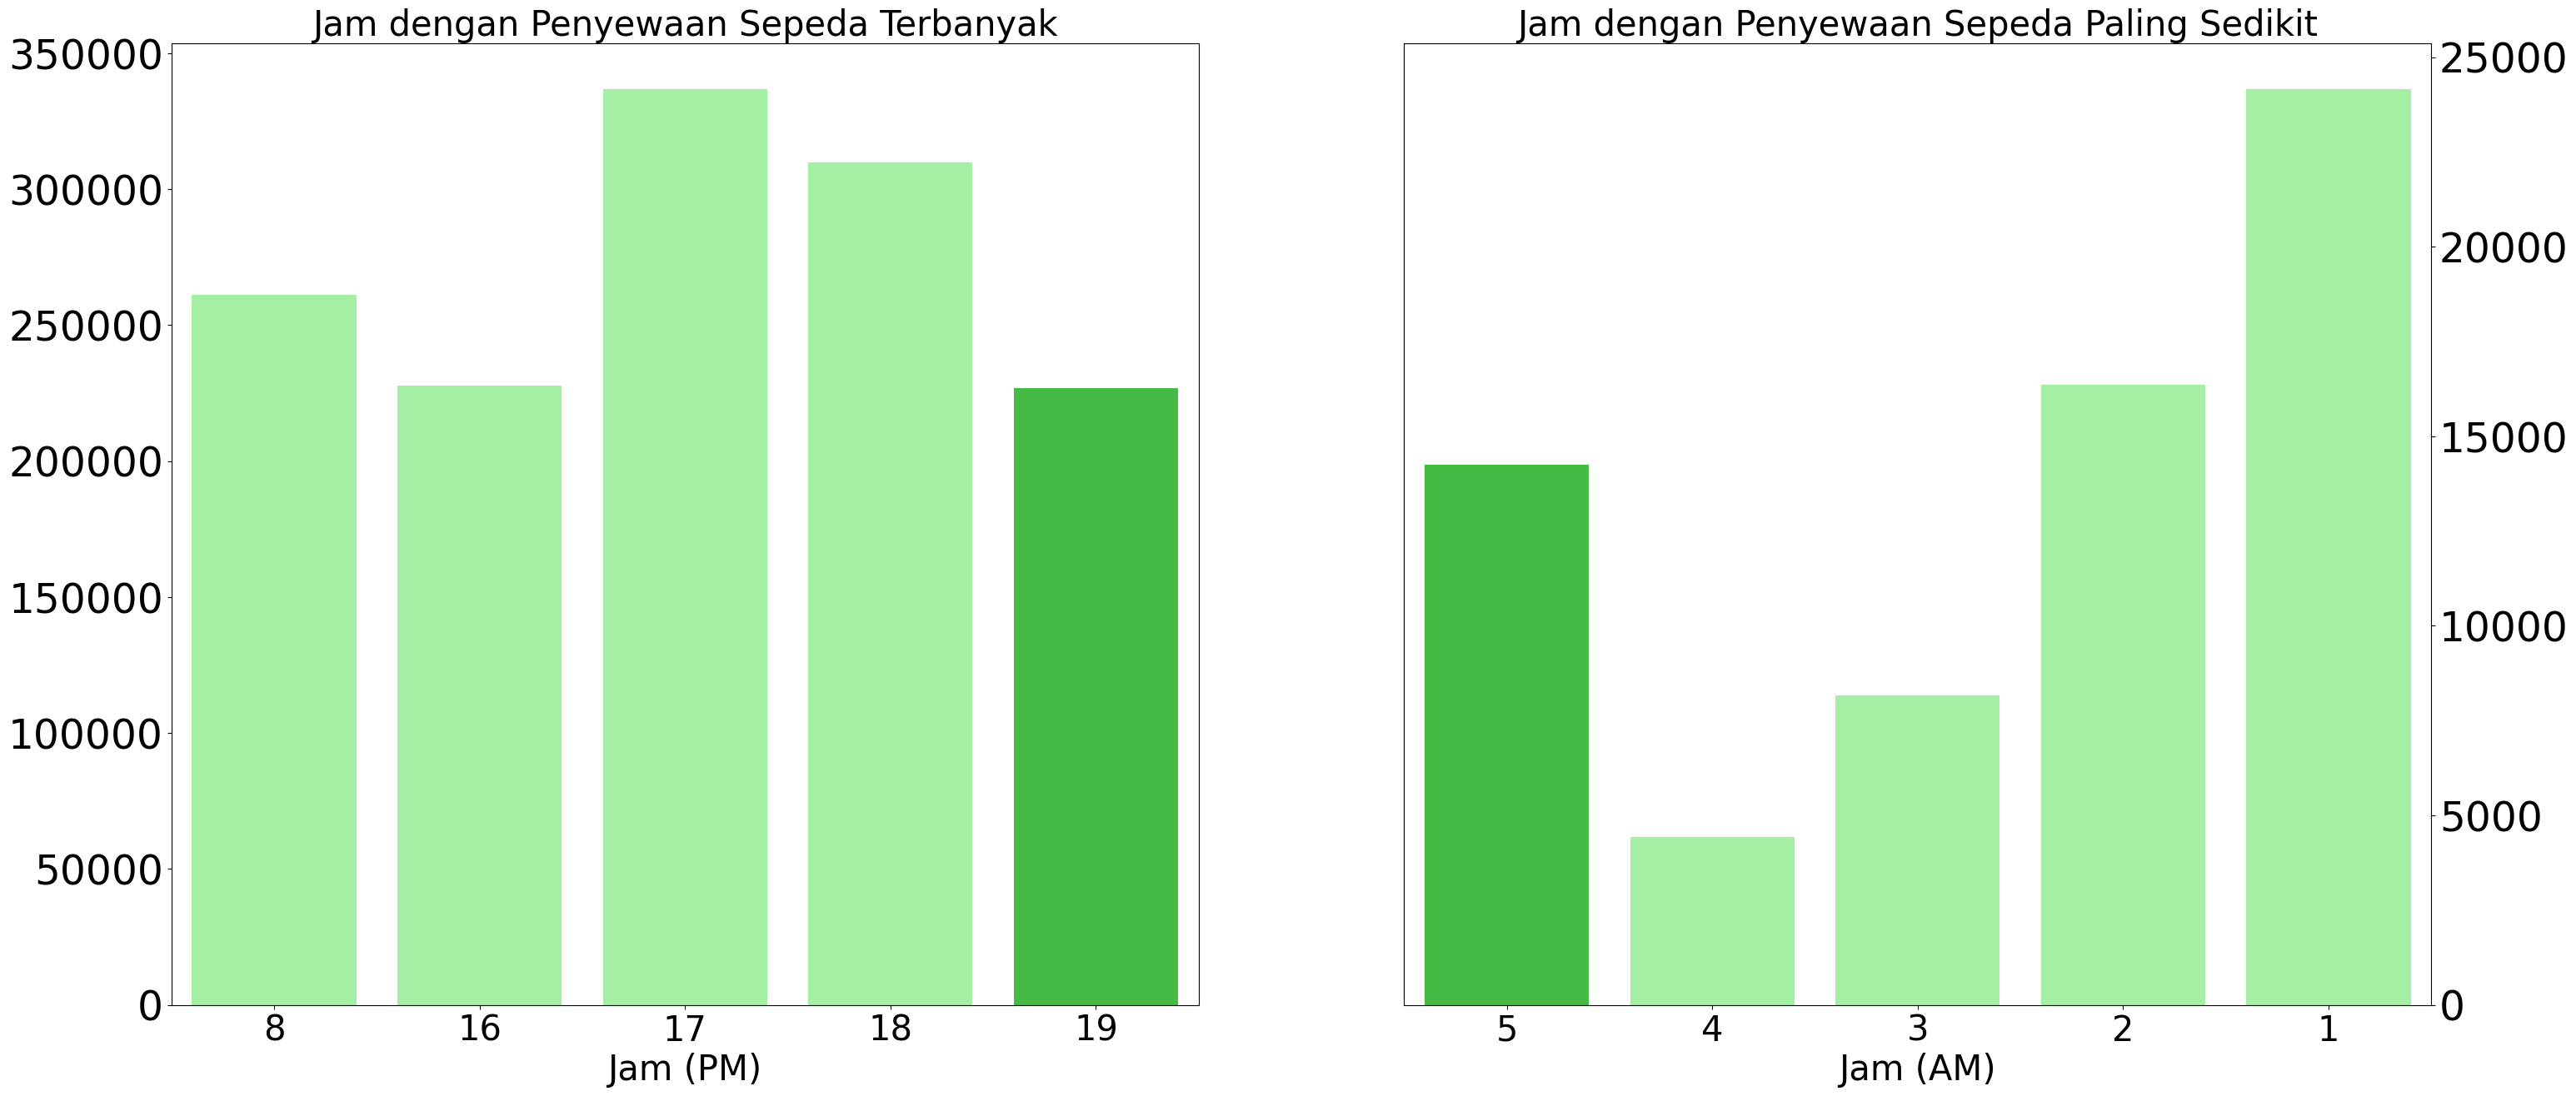

In [95]:
# Membuat bar chart untuk membandingkan jumlah penyewaan sepeda berdasarkan jam
fig, axes = plt.subplots(1, 2, figsize=(35, 15))

# Barplot untuk jam dengan penyewaan sepeda terbanyak
sns.barplot(x="hr", y="cnt", data=sum_order_items_df.nlargest(5, 'cnt'),
            palette=["#98FB98", "#98FB98", "#98FB98", "#98FB98", "#32CD32"], ax=axes[0])

# Pengaturan label dan judul pada subplot pertama
axes[0].set_title("Jam dengan Penyewaan Sepeda Terbanyak", fontsize=30)
axes[0].set_xlabel("Jam (PM)", fontsize=30)
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', labelsize=30)
axes[0].tick_params(axis='y', labelsize=35)

# Barplot untuk jam dengan penyewaan sepeda paling sedikit
sns.barplot(x="hr", y="cnt", data=sum_order_items_df.nsmallest(5, 'cnt'),
            palette=["#98FB98", "#98FB98", "#98FB98", "#98FB98", "#32CD32"], ax=axes[1])

# Pengaturan label dan judul pada subplot kedua
axes[1].set_title("Jam dengan Penyewaan Sepeda Paling Sedikit", fontsize=30)
axes[1].set_xlabel("Jam (AM)", fontsize=30)
axes[1].set_ylabel("")
axes[1].invert_xaxis()
axes[1].tick_params(axis='x', labelsize=30)
axes[1].tick_params(axis='y', labelsize=35)
axes[1].yaxis.tick_right()

# Menampilkan bar chart
plt.show()


Grafik menunjukkan bahwa jam 17.00 merupakan waktu paling sibuk untuk menyewa sepeda dengan jumlah mencapai hampir 350.000 unit. Di sisi lain, jam 04.00 menjadi waktu dengan permintaan paling rendah, hanya sekitar kurang dari  5.000 unit sepeda yang disewa

### Pertanyaan 2:  Seberapa besar kontribusi pengguna terdaftar dan pengguna kasual terhadap total penyewaan?

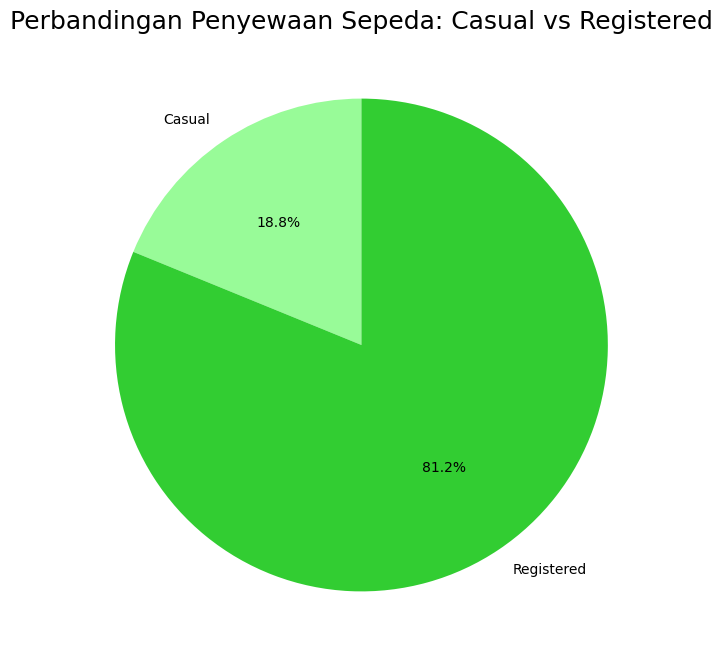

In [99]:
# Menghitung total untuk kolom 'casual' dan 'registered'
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Membuat data untuk pie chart
pie_data = [total_casual, total_registered]
pie_labels = ['Casual', 'Registered']

# Membuat pie chart
plt.figure(figsize=(8, 8))  # Menambahkan ukuran plot
plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=["#98FB98", "#32CD32"], startangle=90)

# Menampilkan pie chart
plt.title('Perbandingan Penyewaan Sepeda: Casual vs Registered', fontsize=18)
plt.show()

Persentase pengguna yang telah melakukan registrasi adalah 81,2%, sedangkan sisanya sebesar 18,8% merupakan pengguna kasual yang belum melakukan registrasi

## Analisis Lanjutan (Opsional)

In [114]:
# analisis clustering: Tingkat penggunaan produk berdasarkan kelembapan udara
humidity_count = hour_df.groupby("humidity_category")["cnt"].count().reset_index(name="count")
humidity_count

,humidity_category,count
0,Ideal,5505
1,Terlalu Lembab,8356
2,Terlalu kering,3518


Dengan menganalisis data ini, kita bisa menentukan target pasar yang lebih spesifik untuk layanan penyewaan sepeda pada kondisi cuaca lembap

## Conclusion

- Conclusion pertanyaan 1: Berdasarkan visualisasi data, terlihat jelas bahwa puncak aktivitas penyewaan sepeda terjadi pada pukul 17.00. Sebaliknya, permintaan akan sepeda mencapai titik terendahnya pada pukul 04.00.

- Conclusion pertanyaan 2: Persentase pengguna yang telah melakukan registrasi adalah 81,2%, sedangkan sisanya sebesar 18,8% merupakan pengguna kasual yang belum melakukan registrasi.